# Análisis de temperaturas y radiación en Madrid, España

En este notebook se analizan brevemente las temperaturas y la radiación en la ciudad de Madrid.

In [ ]:
import pandas as pd
import requests

desde = "20200101"  # AAAAMMDD
hasta = "20241231"

lat = 40.4168  # Madrid
lon = -3.7038

## Obtención de los datos

Los datos se obtienen de la [API de NASA Power Gov](https://power.larc.nasa.gov/docs/services/api/application/).

In [ ]:
url = f"https://power.larc.nasa.gov/api/temporal/daily/point"
params = {
    "parameters": "T2M",
    "start": desde,
    "end": hasta,
    "latitude": lat,
    "longitude": lon,
    "community": "RE",
    "format": "JSON"
}

response = requests.get(url, params=params)
data = response.json()

# Extraer las temperaturas diarias
temps = data.get("properties", {}).get("parameter", {}).get("T2M", {})

# Convertir a DataFrame
df_temperaturas = pd.DataFrame(list(temps.items()), columns=['Fecha', 'Temperatura'])
df_temperaturas['Fecha'] = pd.to_datetime(df_temperaturas['Fecha'], format='%Y%m%d')
df_temperaturas

,Fecha,Temperatura
0,2020-01-01,5.65
1,2020-01-02,4.50
2,2020-01-03,2.87
3,2020-01-04,3.85
4,2020-01-05,4.60
...,...,...
1822,2024-12-27,5.38
1823,2024-12-28,4.06
1824,2024-12-29,3.66
1825,2024-12-30,2.84


In [ ]:
url = f"https://power.larc.nasa.gov/api/temporal/daily/point"
params = {
    "parameters": "ALLSKY_SFC_SW_DWN",
    "start": desde,
    "end": hasta,
    "latitude": lat,
    "longitude": lon,
    "community": "RE",
    "format": "JSON"
}

response = requests.get(url, params=params)
data_radiation = response.json()

rows = []
for day, value in data_radiation['properties']['parameter']['ALLSKY_SFC_SW_DWN'].items():
  rows.append([day, value])

df_radiation = pd.DataFrame(rows, columns=['Fecha', 'Radiacion'])

# Convertir a tipo fecha
df_radiation['Fecha'] = pd.to_datetime(df_radiation['Fecha'], utc=True)
df_radiation['Fecha'] = df_radiation['Fecha'].dt.tz_localize(None)

df_radiation

,Fecha,Radiacion
0,2020-01-01,2.5531
1,2020-01-02,2.5070
2,2020-01-03,1.6529
3,2020-01-04,2.5817
4,2020-01-05,2.7509
...,...,...
1822,2024-12-27,2.1286
1823,2024-12-28,2.6083
1824,2024-12-29,2.6352
1825,2024-12-30,2.6006


In [37]:
# Unir los dataframes df_temperaturas y df_radiation por la columna 'Fecha'
df_merged = pd.merge(df_temperaturas, df_radiation, on='Fecha', how='inner')
df_merged.to_csv('temperaturas_radiacion.csv', index=False)
df_merged

,Fecha,Temperatura,Radiacion
0,2020-01-01,5.65,2.5531
1,2020-01-02,4.50,2.5070
2,2020-01-03,2.87,1.6529
3,2020-01-04,3.85,2.5817
4,2020-01-05,4.60,2.7509
...,...,...,...
1822,2024-12-27,5.38,2.1286
1823,2024-12-28,4.06,2.6083
1824,2024-12-29,3.66,2.6352
1825,2024-12-30,2.84,2.6006


## Visualizaciones


In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

figsize = (14, 6)

title_fontsize = 16
xlabel_fontsize = 13
ylabel_fontsize = 13
xticks_fontsize = 14
yticks_fontsize = 14

xticks_rotation = 25

title_fontweight = 'bold'
xlabel_fontweight = 'bold'
ylabel_fontweight = 'bold'

legend_fontsize = 15

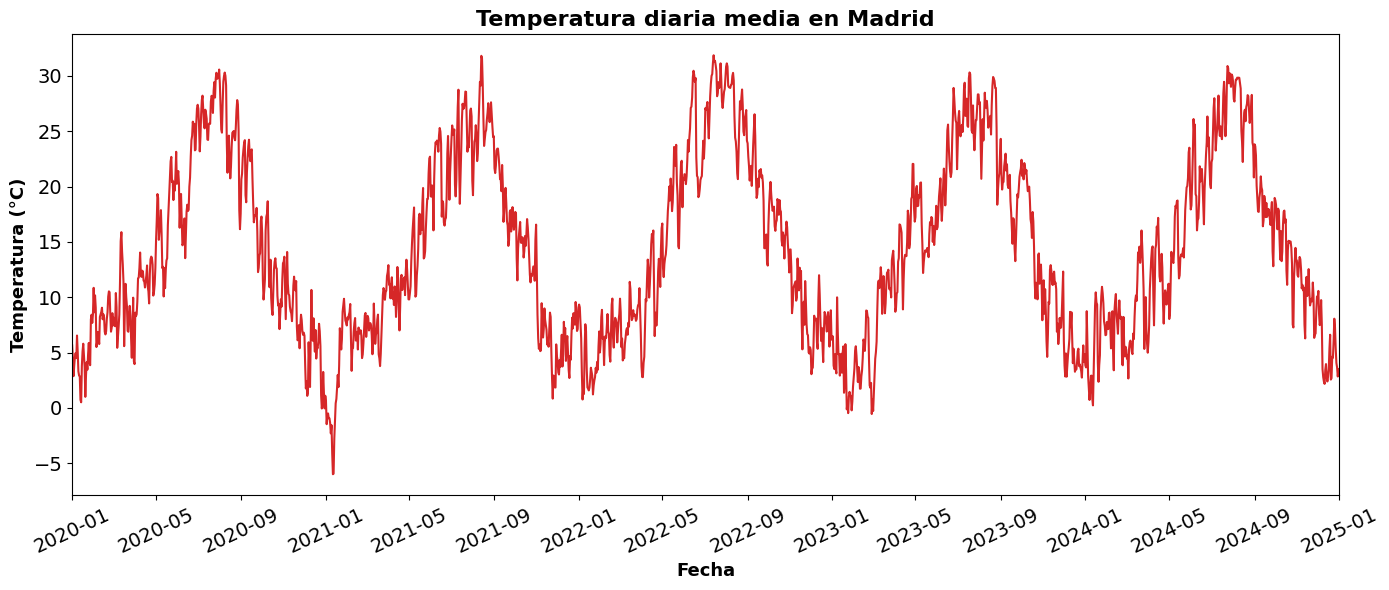

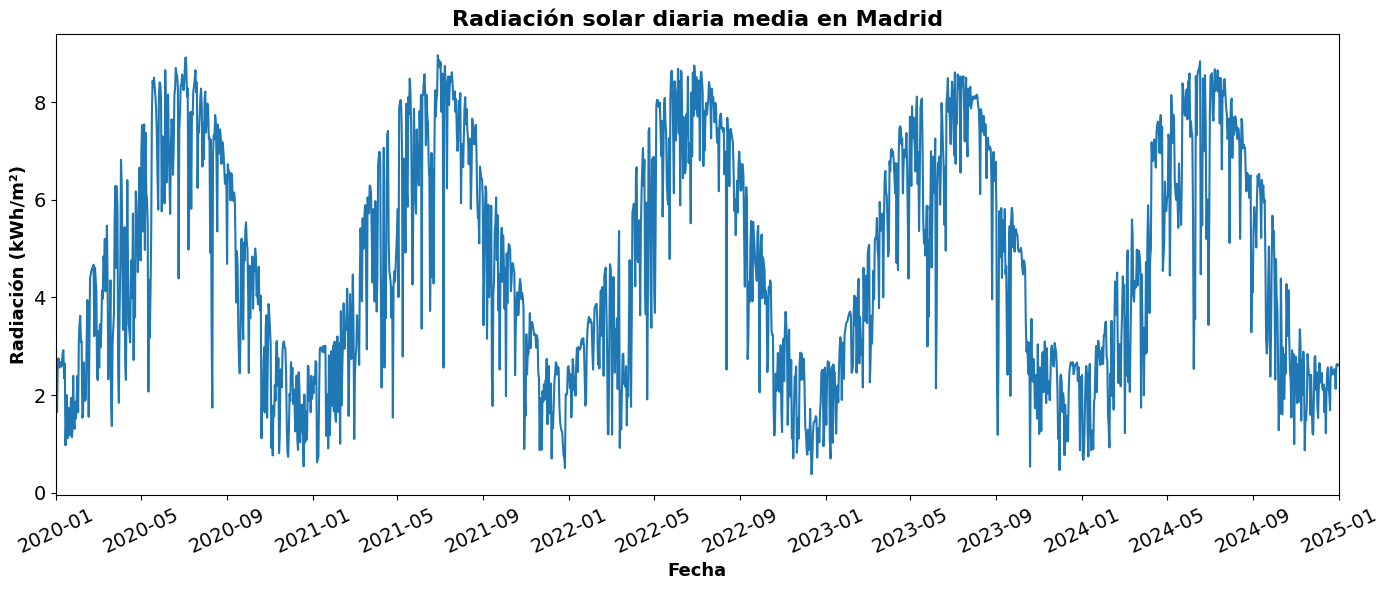

In [35]:
# Visualización de la temperatura
plt.figure(figsize=figsize)
plt.plot(df_temperaturas['Fecha'], df_temperaturas['Temperatura'], color='tab:red')
plt.title('Temperatura diaria media en Madrid', fontsize=title_fontsize, fontweight=title_fontweight)
plt.xlabel('Fecha', fontsize=xlabel_fontsize, fontweight=xlabel_fontweight)
plt.ylabel('Temperatura (°C)', fontsize=ylabel_fontsize, fontweight=ylabel_fontweight)
plt.xticks(rotation=xticks_rotation, fontsize=xticks_fontsize)
plt.yticks(fontsize=yticks_fontsize)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 5, 9)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().set_xlim(df_temperaturas['Fecha'].min(), pd.Timestamp('2025-01-01'))
plt.tight_layout()
plt.show()

# Visualización de la radiación
plt.figure(figsize=figsize)
plt.plot(df_radiation['Fecha'], df_radiation['Radiacion'], color='tab:blue')
plt.title('Radiación solar diaria media en Madrid', fontsize=title_fontsize, fontweight=title_fontweight)
plt.xlabel('Fecha', fontsize=xlabel_fontsize, fontweight=xlabel_fontweight)
plt.ylabel('Radiación (kWh/m²)', fontsize=ylabel_fontsize, fontweight=ylabel_fontweight)
plt.xticks(rotation=xticks_rotation, fontsize=xticks_fontsize)
plt.yticks(fontsize=yticks_fontsize)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 5, 9)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().set_xlim(df_radiation['Fecha'].min(), pd.Timestamp('2025-01-01'))
plt.tight_layout()
plt.show()

En ambas gráficas podemos observar cómo, tanto la temperatura como la radiación son mucho mayores en los meses de verano que en los de invierno, siguiendo un patrón muy claro.